In [108]:
import pandas as pd
import datetime
from sklearn.neural_network import MLPClassifier
import random
import torch
from sklearn.metrics import roc_auc_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import pickle

In [167]:
fold_i = 3

In [202]:
train_embeddings = np.load(f'/repos/Delivery-Readiness/embeddings/set_d_train_{fold_i}.npy')
test_embeddings = np.load(f'/repos/Delivery-Readiness/embeddings/set_d_test_{fold_i}.npy')
all_embeddings = np.concatenate([train_embeddings, test_embeddings], axis=0)
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=2000, random_state=42)
    # tsne_results = tsne.fit_transform(pca_result)
tsne_results = tsne.fit_transform(all_embeddings)

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 74 samples in 0.001s...
[t-SNE] Computed neighbors for 74 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.833138
[t-SNE] KL divergence after 2000 iterations: -4.541168


In [203]:
test_embeddings.shape

(8, 10)

In [204]:
with open(f'/repos/Delivery-Readiness/data/daily_selected_feature_set_d_readiness/train_{fold_i}.pickle', 'rb') as handle:
    train = pickle.load(handle)
with open(f'/repos/Delivery-Readiness/data/daily_selected_feature_set_d_readiness/test_{fold_i}.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [205]:
result = pd.read_excel(f'/repos/Delivery-Readiness/results/daily_selected_feature_set_d_readiness/test/fold{fold_i}.xlsx')
result = result.drop(columns=['Unnamed: 0'])

In [66]:
result ''= pd.read_excel('/repos/Delivery-Readiness/results/daily_selected_feature_set_d_readiness/test/fold9.xlsx')

SyntaxError: invalid syntax (3764438020.py, line 1)

In [207]:
df_tsne = df_tsne.merge(result, on=['user_id', 'ground_truth'], how='outer')
df_tsne["user_id"] = df_tsne["user_id"].apply(lambda i: str(i))

In [206]:
df_tsne = pd.DataFrame(tsne_results, columns=["X", "Y"])

df_tsne["user_id"] = train['uid'] + test['uid']

df_tsne["Training_set"] = [True] * train_embeddings.shape[0] + [False] * test_embeddings.shape[0]
markers_dict = {
    True: 'o',
    False: 'X',
}
df_tsne["ground_truth"] = train['y'] + test['y']


In [208]:
df_tsne = df_tsne.tail(8)

In [209]:
df_tsne

,X,Y,user_id,Training_set,ground_truth,prediction,correctness,y_score,confidence,x_number_of_days_before_delivery
66,1015.979065,-1135.578735,615,False,1,0.0,False,0.417987,0.582013,-4.0
67,975.062378,-1305.826294,615,False,0,0.0,True,0.417631,0.582369,-4.0
68,-1118.826904,-1166.224487,1374,False,1,0.0,False,0.443791,0.556209,-5.0
69,847.075806,-1088.029663,1374,False,0,0.0,True,0.418209,0.581791,-5.0
70,-1118.826904,-1166.224487,1378,False,1,0.0,False,0.443791,0.556209,-3.0
71,-1118.826904,-1166.224487,1378,False,0,0.0,True,0.443791,0.556209,-3.0
72,-1118.826904,-1166.224487,2171,False,1,0.0,False,0.443791,0.556209,-4.0
73,806.622253,-1258.544678,2171,False,0,0.0,True,0.417633,0.582367,-4.0


<AxesSubplot: xlabel='X', ylabel='Y'>

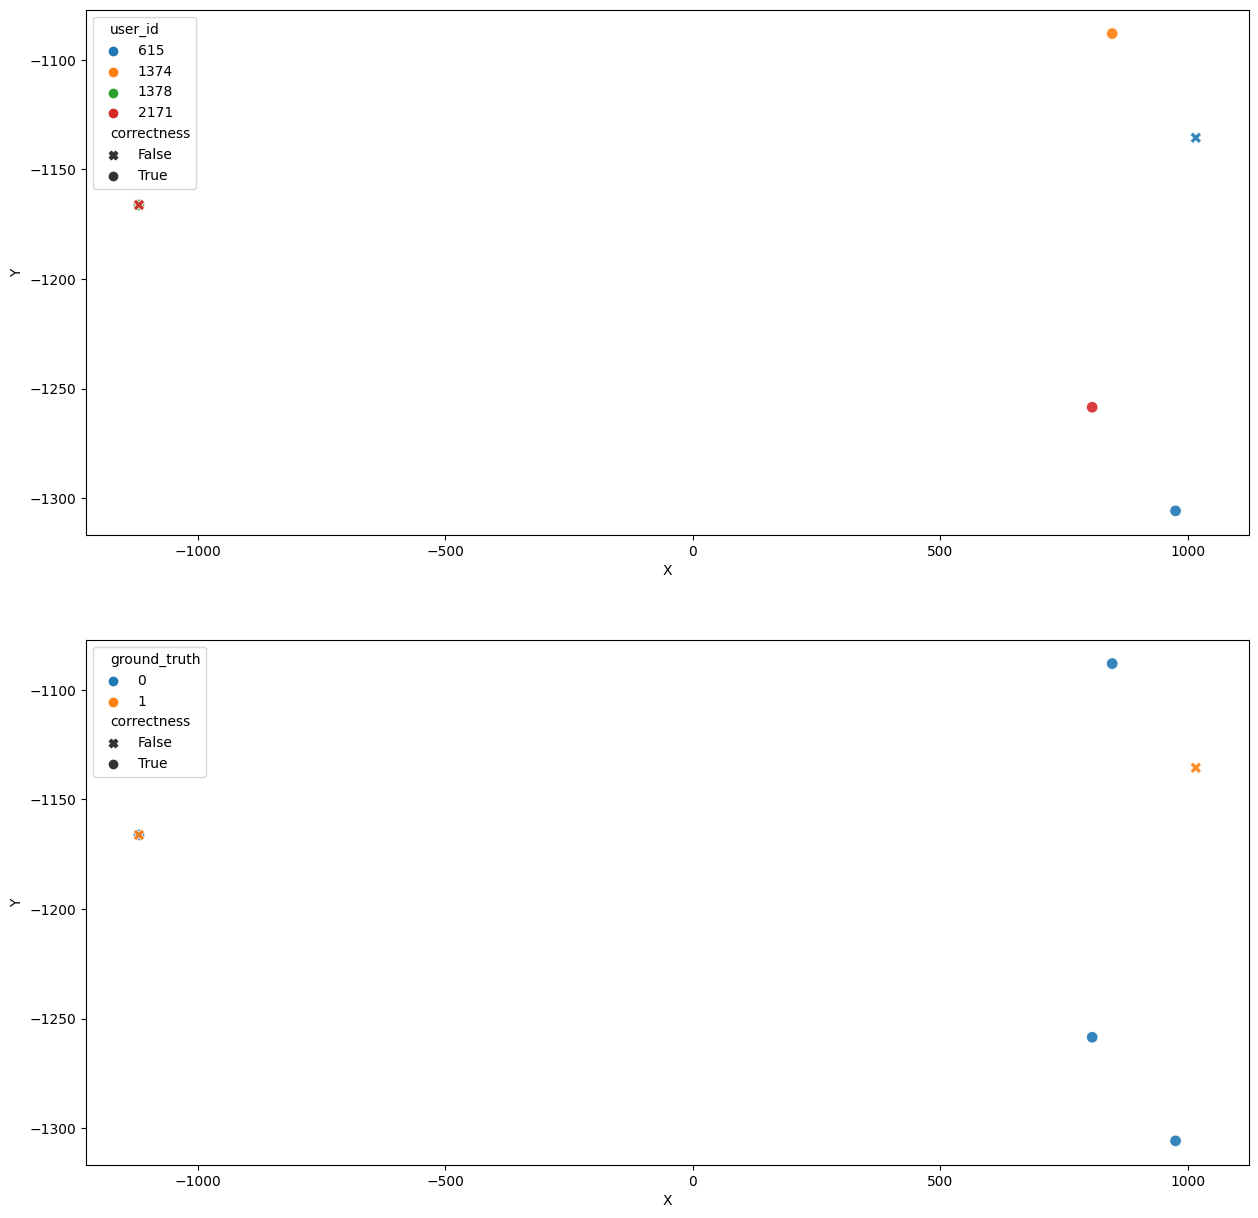

<Figure size 1600x1600 with 0 Axes>

In [210]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))
plt.figure(figsize=(16,16))
sns.scatterplot(
    x="X", y="Y",
    hue="user_id",
    style='correctness',
    # style="Training_set",
    data=df_tsne,
    legend="full", s=70,
    alpha=0.9,
    markers=markers_dict,
    ax=axs[0]
)
sns.scatterplot(
    x="X", y="Y",
    hue="ground_truth",
    style='correctness',
    # style="Training_set",
    data=df_tsne,
    legend="full", s=70,
    alpha=0.9,
    markers=markers_dict,
    ax=axs[1]
)